python 3.11.9


<h2 align="center">Hotels Data Analysis Project<h2>

DATA ANALYSIS IN HOSPITALITY DOMAIN

- a company which onws multiple hotels in India 
- they have many type of room .
- room booking by - website , 3rd party booking apps
- all booking data of verious platfrom connected to a single database(booking database) 
- they have heavy compitiror in market 
- and want to increse their revenue 



***
### ==> 1. Data Import and Data Exploration
***

<!-- ### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv -->

In [2]:
# import all liberey
import pandas as pd

In [26]:
# loading first data
df_booking = pd.read_csv("datasets/fact_bookings.csv")
print("data loaded - fact_bookings.csv")


data loaded - fact_bookings.csv


In [25]:
# looking for 4 rows to know what data i have
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


- lets understand the dataframe 
- unique booking id 
- unique property id
- i have booking date , check in date , chackout date with no of guests
- i have unique room category maybe multiple 
- i have muiltiple booking platform 
- i have rating 
- booking status 
- based on booking status we have 2 type revenue 
- 1 revenue that generated , 2 after cancelation charge /tips/ discount we have real revenue

In [4]:
# i want to know how many rows and columns i have
df_booking.shape

(134590, 12)

In [5]:
# as i saw  have room category , so i want to know how many room category i have
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

['RT1', 'RT2', 'RT3', 'RT4']  i have 4 room category 

In [6]:
# now i want to know how many ways i have for booking a room in hotels
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip', 'journey', 'direct offline']
- so ihave 7 booking methods 

In [7]:
# now i want to know the value of booking for eash platform 
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

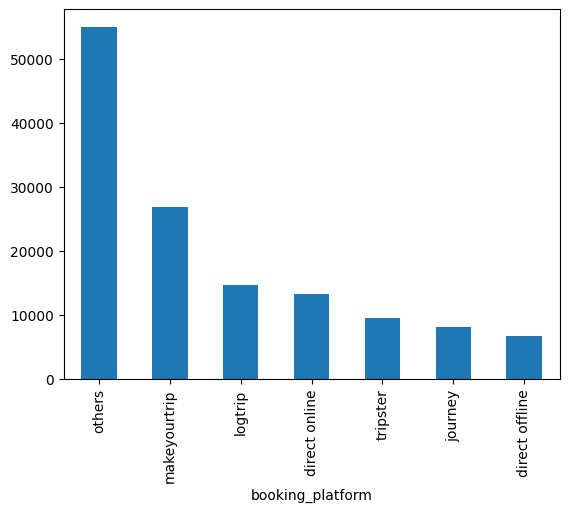

In [28]:
# now i want to plot this 
df_booking.booking_platform.value_counts().plot(kind='bar')

In [9]:
# now i want to get quick statistics 
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


- i can clearly see that my min rating is 1 , max is 5 , most important mean rate is 3.6
- so we have to work to get good rating atleast 4 to get a good impression 
- min no guest is -17 means data error 
- max no guest is 6 , and mean is 2


In [10]:
# reading revenue in this format is confusing so i'm brakeing it 
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

- min booking amount is 6500 
- max booking amount is 28560000 -- this maybe a error unreaalistic value for book a hotel room 

In [11]:
# lets import my other files
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

print("data loaded -dim_date.csv")
print("data loaded -dim_hotels.csv")
print("data loaded -dim_rooms.csv")
print("data loaded -fact_aggregated_bookings.csv")


data loaded -dim_date.csv
data loaded -dim_hotels.csv
data loaded -dim_rooms.csv
data loaded -fact_aggregated_bookings.csv


- let me explore hotels

In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [14]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

we have total 16 luxury and 9 business hotels
- now i want to know how many hotels we have in city wise

In [15]:
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

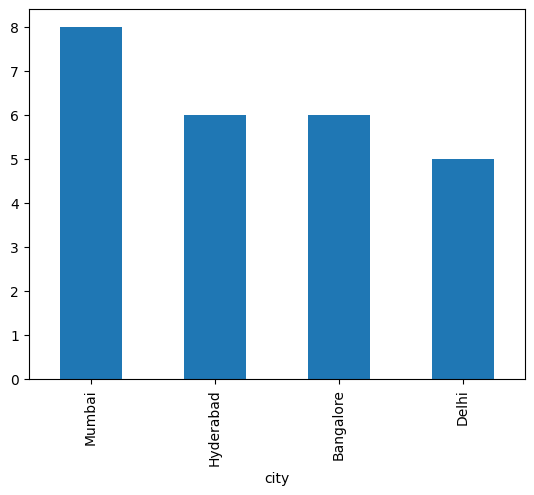

In [16]:
df_hotels.city.value_counts().plot(kind='bar')

***
**Explore aggregate bookings**
***

In [17]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [18]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


max capacity is 50 , min is 3 , mean 25

In [19]:
# now i want unique property id 
print(df_agg_bookings.property_id.unique())

[16559 19562 19563 17558 16558 17560 19558 19560 17561 16560 16561 16562
 16563 17559 17562 17563 18558 18559 18561 18562 18563 19559 19561 17564
 18560]


In [20]:
# so i want to see total booking as per property
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

<Axes: xlabel='property_id'>

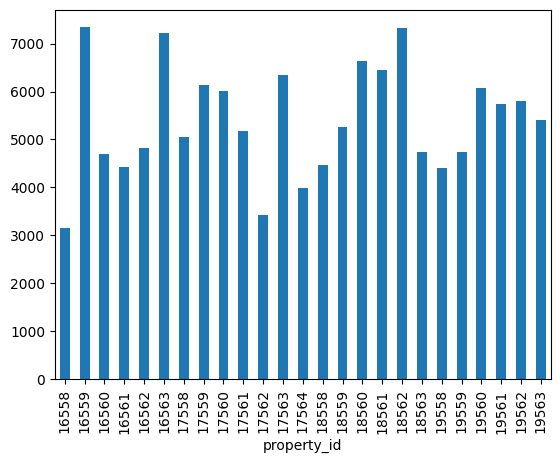

In [21]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum().plot(kind='bar')

In [30]:
# lets find out in which dates we get booking then our capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


6 times we get lot of bookings that it is greater than our capacity

In [31]:
# let find out the property with highest capacity
print(df_agg_bookings.capacity.max())

50.0


In [ ]:
df_agg_bookings[(df_agg_bookings.capacity == df_agg_bookings.capacity.max())]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# =================================
# ***data cleaning***
# =================================

In [37]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


- so i can clearly see that in no_guest , the min no of guest is -17 ---so this is a error

In [41]:
# unvalid record which are negative
df_booking[df_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [40]:
df_booking.shape

(134590, 12)

In [44]:
# storing the valid data frame 
df_booking= df_booking[df_booking.no_guests>=0]
df_booking.shape

(134578, 12)

i removed all the data rows which have -ve guests 

In [45]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


as i saw early that i have max revenue generated on sinagle booking is too large so now i want to handel that error

In [46]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [56]:
# avg revenue generated  # standered deviation 
avg , std = df_booking.revenue_generated.mean(),df_booking.revenue_generated.std()
avg,std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [57]:
# 3 standered deviation 
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [58]:
# 3 standered deviation 
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)